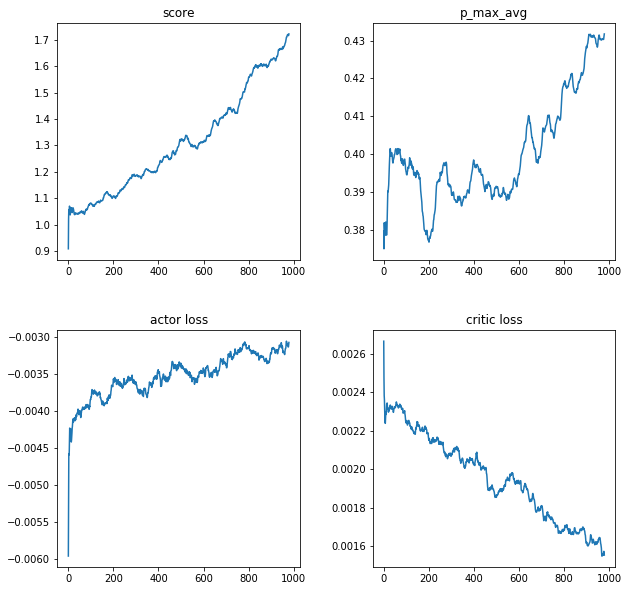

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
SMOOTH_NUM = 50
def smooth(l):
    if len(l) < SMOOTH_NUM:
        return l
    tmp = []
    current_sum = 0
    for i in range(len(l)):
        current = l[i]
        current_sum += current
        tmp.append(current_sum/(i+1))
        if i == SMOOTH_NUM-2:
            break
    for i in range(SMOOTH_NUM-1, len(l)):
        tmp.append(sum(l[i-(SMOOTH_NUM-1):i+1])/SMOOTH_NUM)
    l = tmp
    return l

df = pd.read_csv('./output.csv', skiprows=0)
a = np.array(df)
index = a[:, 0]
episode = a[:, 1]
score = smooth(a[:, 2])
pmax = smooth(a[:, 3])
al = smooth(a[:, 4])
cl = smooth(a[:, 5])
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].set_title('score')
axes[0][0].plot(index, score)
axes[0][1].set_title('p_max_avg')
axes[0][1].plot(index, pmax)
axes[1][0].set_title('actor loss')
axes[1][0].plot(index, al)
axes[1][1].set_title('critic loss')
axes[1][1].plot(index, cl)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
fig.savefig('./statistics.png')
plt.close()




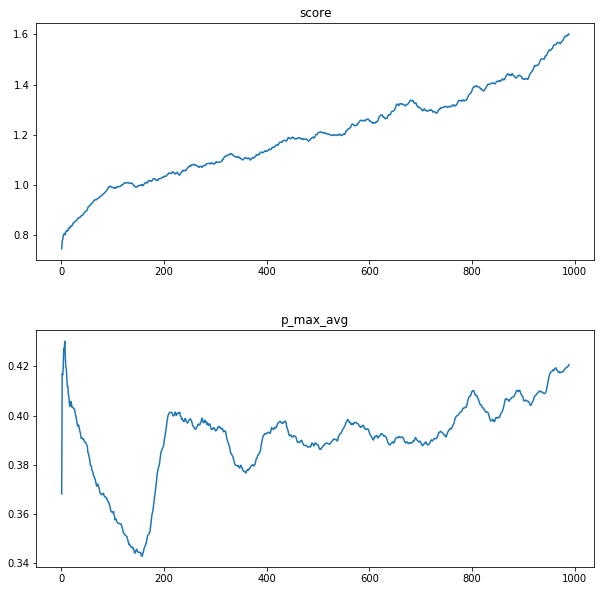

In [229]:
SMOOTH_NUM = 50
df = pd.read_csv('./his4/output_concat.csv', skiprows=0)
a = np.array(df)
index = a[:, 0]
score = smooth(a[:, 1])
pmax = smooth(a[:, 2])
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].set_title('score')
axes[0].plot(index, score)
axes[1].set_title('p_max_avg')
axes[1].plot(index, pmax)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
fig.savefig('./statistics.png')
plt.close()